In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
movies = pd.read_csv("../cleaned_data/cleaned_movies.csv")
ratings = pd.read_csv("../cleaned_data/cleaned_ratings.csv")

Lets work on finding which genres get higher ratings.

merge average_ratings and movies and group by genre

plot results

In [3]:
# get average ratings per movie
avg_ratings = ratings.groupby("movieId")["rating"].mean()

# merge movies and avg_ratings on movieId, adding an average rating column to the movies dataframe
genre_avg_ratings = pd.merge(movies, avg_ratings, on="movieId")

# if unnammed rows
genre_avg_ratings = genre_avg_ratings.drop("Unnamed: 0", axis=1)

# split up the genres
genre_avg_ratings["genres"] = genre_avg_ratings["genres"].str.split('|')
genre_avg_ratings = genre_avg_ratings.explode(column="genres")

# create a new dataframe, the rows will be by genres
# , agg computes the average rating of EACH genre by rating and calculates the mean of each
# reset_index() turns the grouped index back into a regular column
genre_sum = genre_avg_ratings.groupby("genres").agg({"rating":"mean"}).reset_index()

# sort the ratings
genre_sum = genre_sum.sort_values(by="rating", ascending=False)

# get rid of no genres listed rows
# genre_sum = genre_sum[genre_sum["genres"] != '(no genres listed)']

### Plot the results

/var/folders/_b/wwq21lgj60n56gm2gb2n93sw0000gn/T/ipykernel_54924/3775981095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="genres", y="rating", data=genre_sum, palette="viridis")


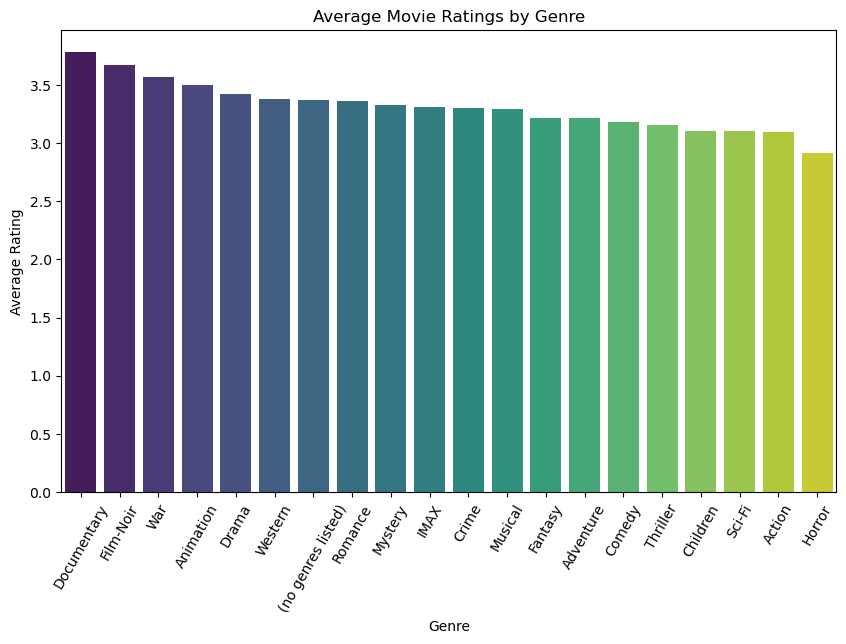

In [4]:

plt.figure(figsize=(10,6))
sns.barplot(x="genres", y="rating", data=genre_sum, palette="viridis")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Average Movie Ratings by Genre")
plt.xticks(rotation=60)
plt.show()